## Objetivo:

El objetivo de este proyecto es analizar y modelar la tendencia de crecimiento en el número de pasajeros de aerolíneas internacionales entre 1949 y 1960, utilizando un modelo matemático exponencial para ajustar los datos históricos disponibles.

**Fuente de datos:**
- https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv

## 1. Análisis y Determinación de Parámetros

In [3]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"


In [4]:
import numpy as np
data = np.genfromtxt(url, delimiter=',', skip_header=1, usecols=1)


In [5]:
import matplotlib.pyplot as plt

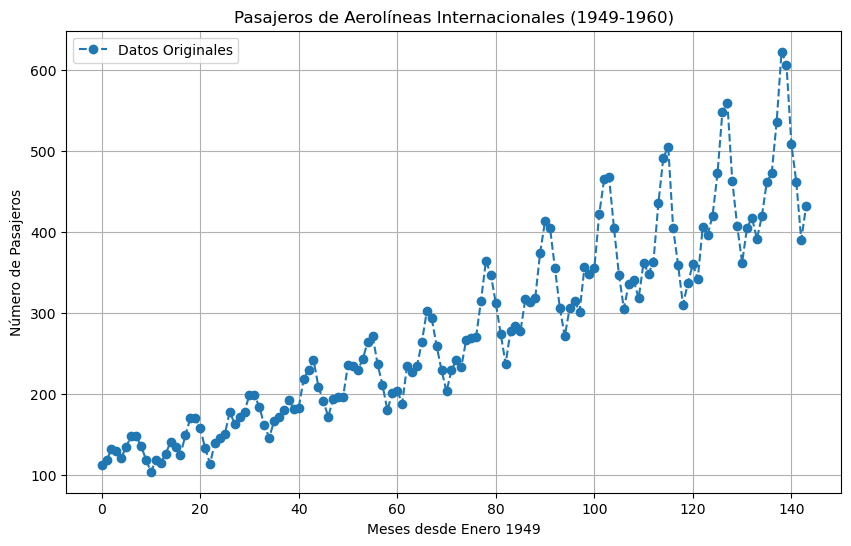

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(data, label='Datos Originales', linestyle='--', marker='o')
plt.title('Pasajeros de Aerolíneas Internacionales (1949-1960)')
plt.xlabel('Meses desde Enero 1949')
plt.ylabel('Número de Pasajeros')
plt.grid(True)
plt.legend()
plt.show()

In [10]:
log_data = np.log(data)
x = np.arange(1, len(data) + 1)
X = np.column_stack((np.ones(len(x)), x))

In [11]:
X_pinv = np.linalg.pinv(X)
params = np.dot(X_pinv, log_data)
print(params)

[4.81366828 0.01004838]


In [13]:
log_A = params[0]
B = params[1]
A = np.exp(log_A)

In [15]:
B

0.010048381741695117

# Explicación del modelo
#### Ecuación General del Modelo Exponencial

El modelo exponencial general que estamos ajustando a los datos de pasajeros de aerolíneas se puede expresar como:

$$ y = Ae^{Bx} $$

donde:
- $ y $ representa el número de pasajeros.
- $ x $ es el tiempo (meses desde el inicio del registro).
- $ A $ y $ B $ son parámetros del modelo, donde $ A $ es el factor de escala y $ B $ es la tasa de crecimiento exponencial.

#### Linearización del Modelo

Para facilitar el ajuste de este modelo a los datos usando técnicas de regresión lineal, aplicamos el logaritmo natural a ambos lados de la ecuación, transformándola en una forma lineal:

$$ \log(y) = \log(Ae^{Bx}) $$

Utilizando la propiedad del logaritmo de un producto, la ecuación se simplifica a:

$$ \log(y) = \log(A) + Bx $$

Esto reformula el problema de encontrar una curva exponencial que se ajuste a los datos a encontrar una línea recta que se ajuste a los logaritmos de los datos, donde:
- $ \log(y) $ es la variable dependiente.
- $ x $ es la variable independiente.
- $ \log(A) $ es el término de intercepción.
- $ B $ es la pendiente de la línea.

#### Ecuación del Modelo Obtenido

Una vez realizada la regresión, obtenemos valores estimados para $ \log(A) $ y $B $. Reexpresando $A $ en términos exponenciales, la ecuación final del modelo ajustado es:

$$y = e^{\log(A)} \cdot e^{Bx} = A \cdot e^{Bx} $$

donde:
- $ A = e^{\log(A)} $ es el valor estimado del factor de escala basado en el ajuste.
- $ B $ es la tasa de crecimiento estimada.

# Presentación de resultados

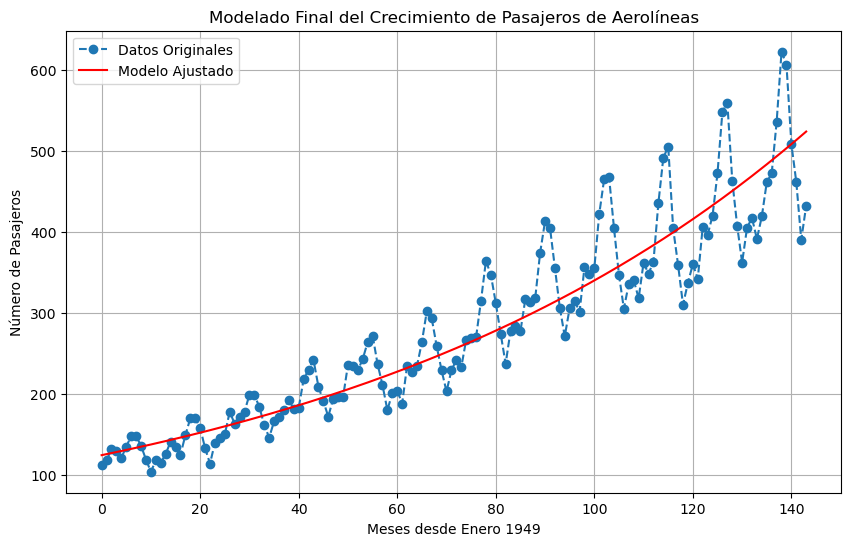

In [17]:
fitted_values = A * np.exp(B * x)


plt.figure(figsize=(10, 6))
plt.plot(data, label='Datos Originales', linestyle='--', marker='o')
plt.plot(fitted_values, label='Modelo Ajustado', color='red')
plt.title('Modelado Final del Crecimiento de Pasajeros de Aerolíneas')
plt.xlabel('Meses desde Enero 1949')
plt.ylabel('Número de Pasajeros')
plt.grid(True)
plt.legend()
plt.show()
